# Research assignment 4


Ashley Borjon

Impact of race on medicalization or criminalization of ADHD

March 11, 2024

In [1]:
cd "/Users/aborjon/Desktop/stats2/soc211"

/Users/aborjon/Desktop/stats2/soc211


In [2]:
set more off

(-set more- irrelevant in this version of Stata)


In [3]:
eststo clear

In [4]:
log using "Research Assignment 4.log", replace

-------------------------------------------------------------------------------
      name:  <unnamed>
       log:  /Users/aborjon/Desktop/stats2/soc211/Research Assignment 4.log
  log type:  text
 opened on:  13 Mar 2024, 09:18:58


In [5]:
use sc_race_r ace11 sc_age_years sc_racer k2q31a k2q31d k7q04r_r addtreat k2q31b k7q02r_r using "/Users/aborjon/Desktop/stats2/soc211/ProblemSet3/nsch_2022_topical_Stata/nsch_2022e_topical.dta", clear

In [6]:
describe ace11 sc_age_years sc_racer k2q31a k2q31d k7q04r_r sc_race_r addtreat k2q31b k7q02r_r


Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
ace11           byte    %10.0g                ACE11
sc_age_years    byte    %8.0g                 SC_AGE_YEARS
sc_racer        byte    %8.0g                 SC_RACER
k2q31a          byte    %10.0g                K2Q31A
k2q31d          byte    %10.0g                K2Q31D
k7q04r_r        byte    %10.0g                K7Q04R_R
sc_race_r       byte    %8.0g                 SC_RACE_R
addtreat        byte    %10.0g                ADDTREAT
k2q31b          byte    %10.0g                K2Q31B
k7q02r_r        byte    %10.0g                K7Q02R_R


In [7]:
codebook ace11 sc_age_years sc_racer k2q31a k2q31d k7q04r_r sc_race_r addtreat k2q31b k7q02r_r


-------------------------------------------------------------------------------
ace11                                                                     ACE11
-------------------------------------------------------------------------------

                  Type: Numeric (byte)

                 Range: [1,2]                         Units: 1
         Unique values: 2                         Missing .: 0/54,103
       Unique mv codes: 1                        Missing .*: 2,158/54,103

            Tabulation: Freq.  Value
                        1,638  1
                       50,307  2
                        2,158  .m

-------------------------------------------------------------------------------
sc_age_years                                                       SC_AGE_YEARS
-------------------------------------------------------------------------------

                  Type: Numeric (byte)

                 Range: [0,17]                        Units: 1
         Unique values: 18  

In [8]:
qui label var sc_race_r"Child's Race" 
qui label var ace11"Mistr. for Diagnosis"
qui label var sc_age_years"Child's Age"
qui label var k2q31d"Taking ADHD Meds"
qui label var k7q04r_r"Times School Contacted w/ Probs"
qui label var k2q31a"Diagnosed w/ ADHD"
qui label var addtreat"Behavioral Treatment"
qui label var k2q31b"Currently have ADHD/ADD"
qui label var k7q02r_r"Days Child Missed School"

In [9]:
gen school_contact=k7q04r_r

label var school_contact "Times School Contacted"
label define school_contact 1"None" 2"1 time" 3"2 or more times" 
label values school_contact school_contact

(20,227 missing values generated)


In [10]:
replace school_contact=. if k7q04r_r==(.m)
replace school_contact=. if k7q04r_r==(.n)

codebook school_contact

(486 real changes made, 486 to missing)
(19,741 real changes made, 19,741 to missing)

-------------------------------------------------------------------------------
school_contact                                           Times School Contacted
-------------------------------------------------------------------------------

                  Type: Numeric (float)
                 Label: school_contact

                 Range: [1,3]                         Units: 1
         Unique values: 3                         Missing .: 20,227/54,103

            Tabulation: Freq.   Numeric  Label
                       25,908         1  None
                        3,642         2  1 time
                        4,326         3  2 or more times
                       20,227         .  


In [11]:
gen child_race=sc_race_r

label var child_race "Race of Child"
label define child_race 1"White" 2"Black/AA" 3"A. Indian/Alaska Nat." 4"Asian" 5"Hawaiian/Pac. Islander" 7"2 or more races"
label values child_race child_race

codebook child_race


-------------------------------------------------------------------------------
child_race                                                        Race of Child
-------------------------------------------------------------------------------

                  Type: Numeric (float)
                 Label: child_race

                 Range: [1,7]                         Units: 1
         Unique values: 6                         Missing .: 0/54,103

            Tabulation: Freq.   Numeric  Label
                       41,337         1  White
                        3,710         2  Black/AA
                          532         3  A. Indian/Alaska Nat.
                        3,450         4  Asian
                          347         5  Hawaiian/Pac. Islander
                        4,727         7  2 or more races


In [12]:
gen child_adhd=k2q31b

label var child_adhd "Currently have ADD/ADHD"
label define child_adhd 1"Yes" 2"No" 
label values child_adhd child_adhd

(48,652 missing values generated)


In [13]:
replace child_adhd=. if k2q31b==(.m)
replace child_adhd=. if k2q31b==(.l)

codebook child_adhd

(432 real changes made, 432 to missing)
(48,220 real changes made, 48,220 to missing)

-------------------------------------------------------------------------------
child_adhd                                              Currently have ADD/ADHD
-------------------------------------------------------------------------------

                  Type: Numeric (float)
                 Label: child_adhd

                 Range: [1,2]                         Units: 1
         Unique values: 2                         Missing .: 48,652/54,103

            Tabulation: Freq.   Numeric  Label
                        5,119         1  Yes
                          332         2  No
                       48,652         .  


In [14]:
tab school_contact child_adhd


                |    Currently have
   Times School |       ADD/ADHD
      Contacted |       Yes         No |     Total
----------------+----------------------+----------
           None |     2,316        198 |     2,514 
         1 time |       731         55 |       786 
2 or more times |     1,760         65 |     1,825 
----------------+----------------------+----------
          Total |     4,807        318 |     5,125 


In [15]:
gen adhd_meds=k2q31d

label var adhd_meds "Currently taking ADHD Meds"
label define adhd_meds 1"yes" 2"no" 
label values adhd_meds adhd_meds
replace adhd_meds=. if k2q31d==(.m)
replace adhd_meds=. if k2q31d==(.l) 

codebook adhd_meds

(48,546 missing values generated)
(326 real changes made, 326 to missing)
(48,220 real changes made, 48,220 to missing)

-------------------------------------------------------------------------------
adhd_meds                                            Currently taking ADHD Meds
-------------------------------------------------------------------------------

                  Type: Numeric (float)
                 Label: adhd_meds

                 Range: [1,2]                         Units: 1
         Unique values: 2                         Missing .: 48,546/54,103

            Tabulation: Freq.   Numeric  Label
                        2,936         1  yes
                        2,621         2  no
                       48,546         .  


In [16]:
tab school_contact adhd_meds


                | Currently taking ADHD
   Times School |         Meds
      Contacted |       yes         no |     Total
----------------+----------------------+----------
           None |     1,355      1,227 |     2,582 
         1 time |       440        354 |       794 
2 or more times |     1,052        778 |     1,830 
----------------+----------------------+----------
          Total |     2,847      2,359 |     5,206 


In [17]:
gen missed_days=k7q02r_r

label var missed_days "Days Child Missed School"
label define missed_days 1"No Missed Days" 2"1-3 Days" 3"4-6 Days" ///
4"7-10 Days" 5"11 or More Days" 6"Child not Enrolled"
label values missed_days missed_days

codebook missed_days

(20,188 missing values generated)

-------------------------------------------------------------------------------
missed_days                                            Days Child Missed School
-------------------------------------------------------------------------------

                  Type: Numeric (float)
                 Label: missed_days

                 Range: [1,6]                         Units: 1
         Unique values: 6                         Missing .: 0/54,103
       Unique mv codes: 2                        Missing .*: 20,188/54,103

            Tabulation: Freq.   Numeric  Label
                        8,583         1  No Missed Days
                       12,166         2  1-3 Days
                        6,453         3  4-6 Days
                        3,736         4  7-10 Days
                        2,768         5  11 or More Days
                          209         6  Child not Enrolled
                          447        .m  
                       19

In [18]:
gen days_missed=.
replace days_missed=0 if missed_days==1
replace days_missed=2 if missed_days==2
replace days_missed=5 if missed_days==3
replace days_missed=8.5 if missed_days==4
replace days_missed=11 if missed_days==5

(54,103 missing values generated)
(8,583 real changes made)
(12,166 real changes made)
(6,453 real changes made)
(3,736 real changes made)
(2,768 real changes made)


In [19]:
gen contact=.
replace contact=0 if school_contact==1
replace contact=1 if school_contact==2
replace contact=2 if school_contact==3

(54,103 missing values generated)
(25,908 real changes made)
(3,642 real changes made)
(4,326 real changes made)


In [20]:
tab sc_age_years


Child's Age |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |      1,930        3.57        3.57
          1 |      2,514        4.65        8.21
          2 |      4,176        7.72       15.93
          3 |      3,766        6.96       22.89
          4 |      3,618        6.69       29.58
          5 |      3,737        6.91       36.49
          6 |      2,669        4.93       41.42
          7 |      2,435        4.50       45.92
          8 |      2,559        4.73       50.65
          9 |      2,526        4.67       55.32
         10 |      2,600        4.81       60.13
         11 |      2,545        4.70       64.83
         12 |      2,625        4.85       69.68
         13 |      2,787        5.15       74.83
         14 |      3,011        5.57       80.40
         15 |      3,341        6.18       86.57
         16 |      3,518        6.50       93.08
         17 |      3,746        6.92      100.00
------------+------

In [21]:
gen child_age=.
replace child_age=1 if sc_age_years==0 & sc_age_years <=4
replace child_age=2 if sc_age_years==5 & sc_age_years <=10
replace child_age=3 if sc_age_years==11 & sc_age_years <=17

(54,103 missing values generated)
(1,930 real changes made)
(3,737 real changes made)
(2,545 real changes made)


In [22]:
label variable child_age "Age of Child"

In [23]:
label define child_age 1 "less than school age" 2 "early school years" 3 "older school kid"
label values child_age child_age

In [24]:
tab child_age sc_age_years


                     |           Child's Age
        Age of Child |         0          5         11 |     Total
---------------------+---------------------------------+----------
less than school age |     1,930          0          0 |     1,930 
  early school years |         0      3,737          0 |     3,737 
    older school kid |         0          0      2,545 |     2,545 
---------------------+---------------------------------+----------
               Total |     1,930      3,737      2,545 |     8,212 


In [25]:
gen mistreat=.
replace mistreat=1 if ace11==1
replace mistreat=0 if ace11==2

label var mistreat "Mistreatment due to Diagnosis"
label define mistreat 1 "Has been mistreated" 


(54,103 missing values generated)
(1,638 real changes made)
(50,307 real changes made)


In [26]:
pwcorr mistreat adhd_meds child_race child_age


             | mistreat adhd_m~s child~ce child~ge
-------------+------------------------------------
    mistreat |   1.0000 
   adhd_meds |  -0.0472   1.0000 
  child_race |   0.0080   0.0606   1.0000 
   child_age |   0.1118  -0.2264  -0.0133   1.0000 


In [27]:
tab mistreat ace11


Mistreatme |
 nt due to | Mistr. for Diagnosis
 Diagnosis |         1          2 |     Total
-----------+----------------------+----------
         0 |         0     50,307 |    50,307 
         1 |     1,638          0 |     1,638 
-----------+----------------------+----------
     Total |     1,638     50,307 |    51,945 


## 1. Develop hypotheses about interactions between your independent variables [1 pt]

You can use the GSS data, Student aid data, or your own data

    A. Write at least one hypothesis involving one of the two following types of interactions
        1) nominal * nominal
        2) nominal * interval-ratio
        
    B. State the predicted direction of association between your dependent variable and:
        1) each of the 2 independent variables by themselves
        2) the interaction of the 2 indendent variables
        3) you can predict that there is no association
        
    C. Write a couple sentences about the theoretical reasons (prior knowledge / research) for each of your predictions

H1: As children with ADHD get older, they are more likely to experience mistreatment at school due to their diagnosis and take ADHD medication. 

DV: Mistreatment
IV: Child's Age and If taking ADHD medication

As the child gets older, they are more likely to take ADHD medication. As a child gets older, they are more likely to experience mistreatment at school due to their diagnosis. 

I think that children are more likely to experience mistreatment at school due to diagnosis as they get older because as children age, their behavior becomes more criminalized (for those with ADHD). Students who have ADHD experience stigmas related to their diagnosis. According to Daley and Rapport-Schlichtmann (2014), stigmatization experiences play a crucial role in the “developmental and academic experiences of individuals who perceive their group memberships to be the reason for stereotyping and prejudice.” (2014) It is this stigma that can bring differing experiences for students with the diagnosis. The literature supports that there are stigmas, so I want to look at when the consequences of those stigmas begin. 


## 2. Test your hypotheses [3 pts]

    A. For each hypothesized interactive relationship: use regression with the appropriate interaction syntax to estimate 1 model with uninteracted variables and 1 model with interacted variables. Use --esttab to output a model with the 2 tables
    
    B. Use margins and marginsplot with the appropriate syntax to visually represent your regression adjusted estimates for given nominal categories or at given interval-ratio values

In [28]:
eststo: reg mistreat i.child_age i.child_race#i.adhd_meds

note: 5.child_race#1b.adhd_meds identifies no observations in the sample.

      Source |       SS           df       MS      Number of obs   =       566
-------------+----------------------------------   F(12, 553)      =      2.61
       Model |  3.52614274        12  .293845229   Prob > F        =    0.0022
    Residual |  62.2689103       553  .112602008   R-squared       =    0.0536
-------------+----------------------------------   Adj R-squared   =    0.0331
       Total |   65.795053       565  .116451421   Root MSE        =    .33556

------------------------------------------------------------------------------
    mistreat | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
   child_age |
early sch..  |  -.1901632   .1735783    -1.10   0.274    -.5311167    .1507903
older sch..  |  -.0872448   .1730224    -0.50   0.614    -.4271063    .2526166
             |
  child_race#|
   adhd_me

In [29]:
eststo: reg mistreat i.child_age i.child_race i.adhd_meds


      Source |       SS           df       MS      Number of obs   =       566
-------------+----------------------------------   F(8, 557)       =      3.14
       Model |  2.83620325         8  .354525406   Prob > F        =    0.0018
    Residual |  62.9588498       557  .113032046   R-squared       =    0.0431
-------------+----------------------------------   Adj R-squared   =    0.0294
       Total |   65.795053       565  .116451421   Root MSE        =     .3362

------------------------------------------------------------------------------
    mistreat | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
   child_age |
early sch..  |  -.1547074   .1722449    -0.90   0.369    -.4930364    .1836217
older sch..  |  -.0477919   .1717314    -0.28   0.781    -.3851123    .2895285
             |
  child_race |
   Black/AA  |   .1120281   .0578632     1.94   0.053    -.0016287    .2256849
A. In

In [30]:
esttab, stats(r2 N, labels("R-Squared" "N")) cells(b(star fmt(3)) se(fmt(3) par)) /// 
nobase mlabels ("Model 1" "Model 2") starlevels(* .05 ** .01 *** .001) ///
coeflabels (mistreat "Mistreatment" child_age "Child Age" adhd_meds "Takes Meds" (child_race 1."White" ///
2."Black/AA" 3."A. Indian/Alaska Nat." 4."Asian" 5."Hawaiian/Pac. Islander" 7."2 or more races"))


--------------------------------------------
                      (1)             (2)   
                  Model 1         Model 2   
                     b/se            b/se   
--------------------------------------------
2.child_age        -0.190          -0.155   
                  (0.174)         (0.172)   
3.child_age        -0.087          -0.048   
                  (0.173)         (0.172)   
2.child_ra~s        0.106                   
                  (0.085)                   
3.child_ra~s       -0.109                   
                  (0.170)                   
4.child_ra~s       -0.120                   
                  (0.123)                   
5.child_ra~s       -0.160                   
                  (0.336)                   
7.child_ra~s        0.063                   
                  (0.060)                   
2.child_race                        0.112   
                                  (0.058)   
3.child_race                       -0.092   
         

In [129]:
tab mistreat


Mistreatmen |
   t due to |
  Diagnosis |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |     50,307       96.85       96.85
          1 |      1,638        3.15      100.00
------------+-----------------------------------
      Total |     51,945      100.00


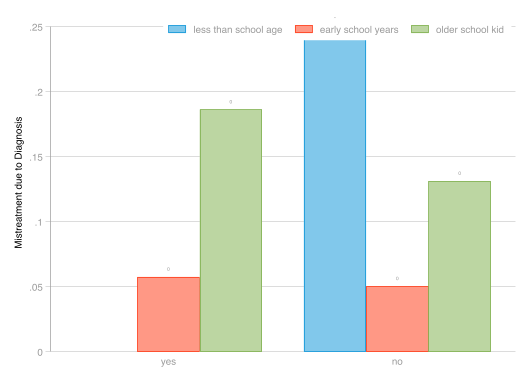

In [31]:
graph bar mistreat, over(child_age) over(adhd_meds) asyvars ytitle (Mistreatment due to Diagnosis) ///
  blabel(bar, format(%7.0fc)) legend(rows(1) position(1) ring(0)) scheme(538w)


Variables that uniquely identify margins: child_age adhd_meds


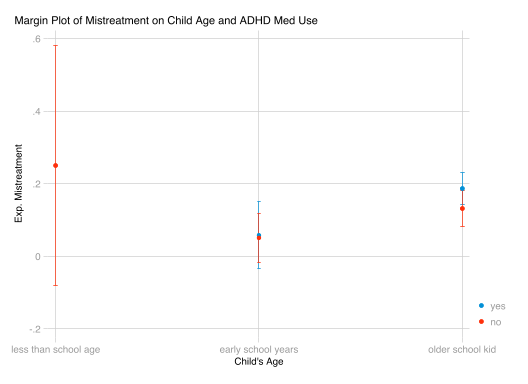

In [51]:
quietly reg mistreat i.child_age i.child_age##i.adhd_meds
quietly margins i.child_age, over(adhd_meds) atmeans
marginsplot, title("Margin Plot of Mistreatment on Child Age and ADHD Med Use") ///
xtitle("Child's Age") ytitle("Exp. Mistreatment") /// 
recast(scatter) scheme(538w)

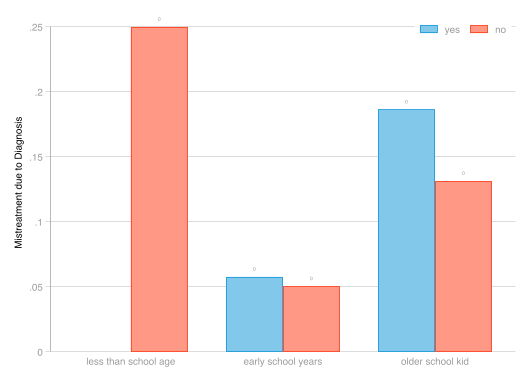

In [55]:
graph bar mistreat, over(adhd_meds) over(child_age) asyvars ytitle (Mistreatment due to Diagnosis) ///
  blabel(bar, format(%7.0fc)) legend(rows(1) position(1) ring(0)) scheme(538w)


Variables that uniquely identify margins: adhd_meds child_age


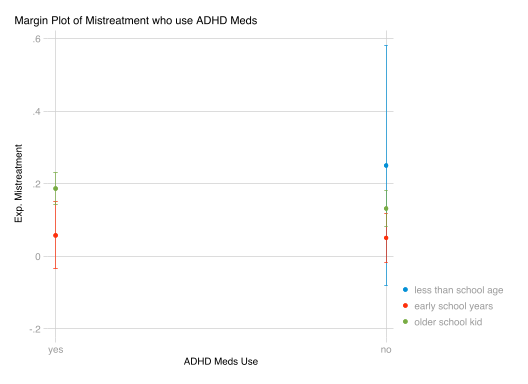

In [54]:
quietly reg mistreat i.adhd_meds i.adhd_meds##i.child_age
quietly margins i.adhd_meds, over(child_age) atmeans
marginsplot, title("Margin Plot of Mistreatment who use ADHD Meds") ///
xtitle("ADHD Meds Use") ytitle("Exp. Mistreatment") /// 
recast(scatter) scheme(538w)


Variables that uniquely identify margins: child_age


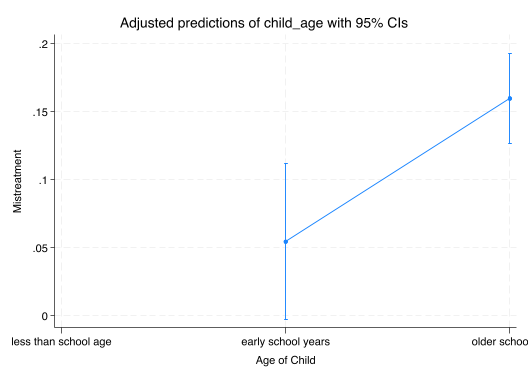

In [57]:
qui margins i.child_age, atmeans
marginsplot, ytitle(Mistreatment)

## 3. Interpret your results [1 pt]

Write a couple sentences answering each of the following questions:

    A. Do the results support or contradict each of your hypotheses?
    
    B. Why do the regression coefficients support or contradict your hypotheses?
    
    C. Why do your regression adjusted estimates from margins for nominal categories or given interval-ratio values support or contradict your hypotheses?

It looks like the results support my hypotheses that as children with ADHD get older, they experience more mistreatment at school due to diagnosis. 
When grouping kids by age, I seperated them by those that are no yet in school, early school years, and older school-aged students. The regression coefficient supports this hypotheses because as a child's age increases so does their experiences of mistreatment at school due to diagnosis and their likelyhood to take ADHD medication. 
My regression adjusted estimates from the margins for nominal categories supports my hypotheses because it allows me to examine the effect that age has on mistreatment due to diagnosis. The change from one unit (group of children by age), had a unit increase in mistreatment. Though, I was not really able to see how adhd medication use affects mistreatment; I think with different graphs it may be worth looking into further. There does seem to be linearity between age and mistreatment but the data above does not support linear association between the child's age and ADHD medication use.